# Bank customer churn analysis and machine learning

 
_<span style='color:red'> This is a live document and will be updated for practise purposes.  </span>_


## 1. Background


Banks are categorically known for being long-standing business. Customers who stay with a bank for longer periods of time would make the bank more profitable. Therefore understanding and preventing **_customer churn_** is essential of banking success.


Customer churn refers to the percentage of customers who have stopped services provided by a bank or other financial institution. 
The average bank or financial instutution loses 25-30 percent of its customers every year. When customers churn, they leave behind fewer deposits and fewer opportunities for loans. The lost revenue could have been used to fund new services, hire more staff, etc.. Instead, competitors who pick up those churned customers could use their revenue boost to increase their competitive edge. This is significant drain on resources, so it's important for banks to understand why customers leave and how to prevent this.



## 2. Objectives

- What factors contribute to customer churn?
- Customer churn prediction with machine learning


## 3. Benefits of the analysis

- Improve customer experience
- Optimize bank products and services
- Customer retention and revenue generation

## 4. Dataset

Bank customer churn prediction is fundamentally a classification problem, with target variable being categorical (churn vs. no churn).
High level analysis (churn rate) is numerical.

**Dataset**

Dataset used including a total of 14 columns, 10000 entries:

- **RowNumber**—row number only
- **CustomerId**-unique ID
- **Surname**—the surname of a customer
- **CreditScore**—credit score
- **Geography**—a customer’s location
- **Gender**
- **Age**
- **Tenure**— the number of years that the customer has been a client of the bank
- **Balance**
- **NumOfProducts**—the number of products that a customer has purchased through the bank.
- **HasCrCard**—whether or not a customer has a credit card
- **IsActiveMember**
- **EstimatedSalary**—estimate salary
- **Exited**—target, whether or not the customer left the bank, '0' means customer stayed, '1' means customer churned

https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers

- Data processing

>- Data loading/reading
>- Data cleaning
>- Check and process missing values
>- Study feature value information

- Exploratory data analysis and visualisation

>- Check customer churn rate
>- Feature information check and analysis
>- Feature colleration analysis

- Data handling for ML

>- Synthetic minority over-sampling technigues(SMOTE)
>- Data split into train and test sets
>- feature standardization/scalling

- Machine learning (ML) prediction

>- Classifications
>>- Logistic regression
>>- KNeighbours classification
>>- Decision tree classification: split the dataset into smaller subsets, then making decisions based on subsets characteristics
>>- Random forest classification (supervised ML)
>>- Gradient boosting classifier
>>- Support vector machines (SVM): create a hyperplan between two categories

>- ML performance evaluation
>>- Accuracy score: (TP+TN)/(TP+FP+TN+FN)
>>- Precision score: TP/(TP+FP)
>>- Recall score: TP/(TP+FN)
>>- F1 score: accuracy: (2*precision*recall)/(precision+recall)

- Save the model

>- joblib


## 4.1. Data processing


In [1]:
# To use if importing dataset directly from web
# !pip install kaggle
# !pip install opendatasets


In [2]:
# Python 3 environment

# file download from network if applicable
#import opendatasets as od

# import data manipulation and analysis libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# import train_test_split lib
from sklearn.model_selection import train_test_split

# import StandardScaler
from sklearn.preprocessing import StandardScaler

# over sampling
from imblearn.over_sampling import SMOTE

# import ML models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# final model saving
import joblib


In [3]:
# # Data loading from Kaggle
# od.download("https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers")
# #data=pd.read_csv("/kaggle/input/bank-customers/Churn Modeling.csv")

# or data loading from local
df = pd.read_csv('churn.csv')
df.head(3)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [4]:
# data cleaning
# drop features that will not contribute to the analysis
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# remove duplicated rows if any
df.drop_duplicates()

# check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


<AxesSubplot:>

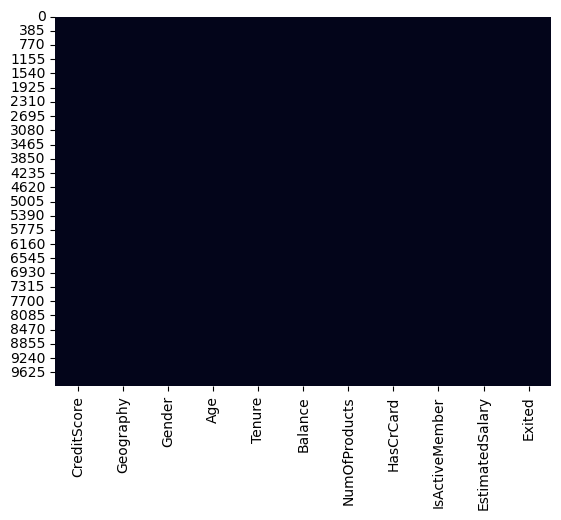

In [5]:
# check missing values
# use seaborn to visualise
sns.heatmap(df.isnull(), cbar=False)

_From above, no null data is included in this dataset, we will move on._

In [6]:
# Study feature value information 1/2
# use describe()
df.describe(include='all')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [7]:
# Study feature value information 2/2
# check unique values of each column
for columns in df:
    print(f'{columns}: {df[columns].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

_**Observations**_
- _'CreditScore', 'Age', 'Balance', and 'EstimatedSalary' have very spreaded values_
- _'Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', and 'IsActiveMember' has limited dataset._


## 4.2. Exploratory data analysis and visualisation


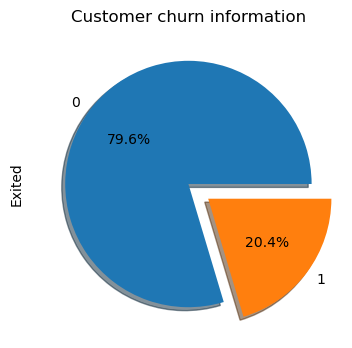

In [8]:
# check customer churn in the dataset
fig = plt.figure(figsize=(5,4))
df['Exited'].value_counts().plot.pie(explode=[0, 0.2], autopct='%1.1f%%', shadow=True)
plt.title('Customer churn information')
plt.show()

_Customer churned is 20.4%, which is much less than the percentage of customers who did not churn, indicationg imbalanced data distribution. Imbalance elimination would need to be performed for ML predictions._


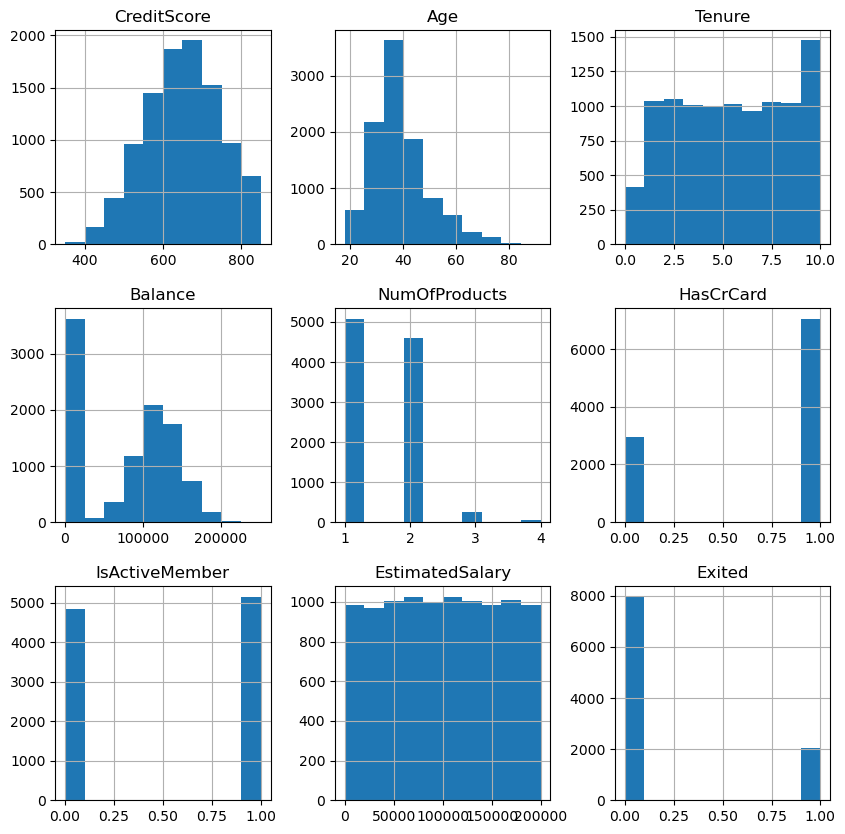

In [9]:
# general feature information check
df.hist(figsize=(10,10))
plt.show()
        

<AxesSubplot:xlabel='IsActiveMember', ylabel='Percent'>

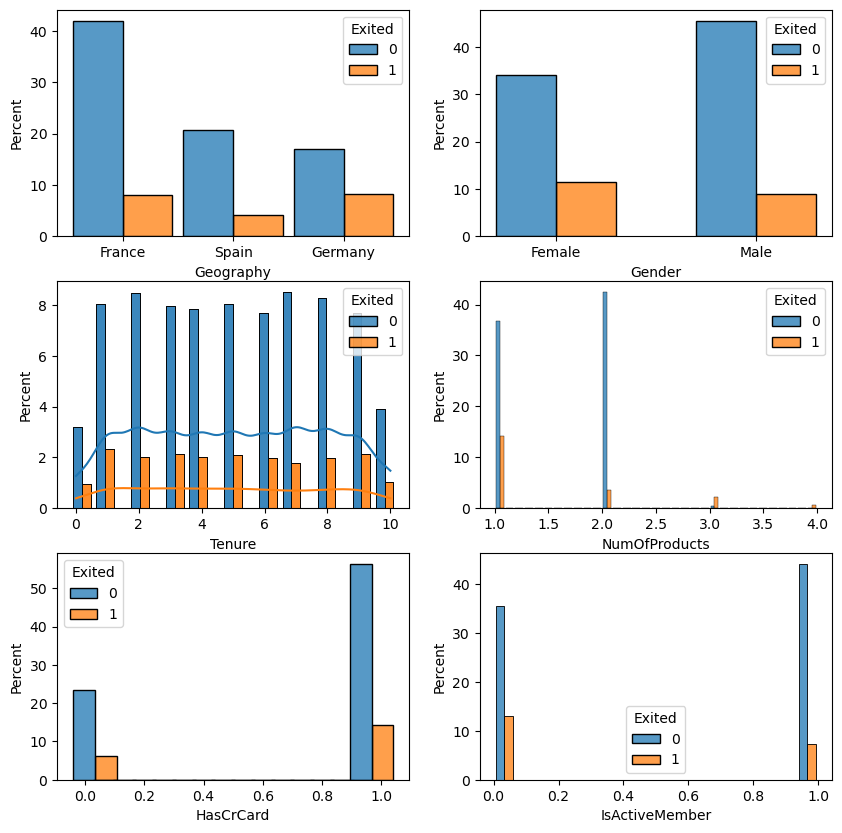

In [10]:
# use histplot check parameter distribution of features for customer churn
fig, axa = plt.subplots(3,2, figsize=(10, 10))
sns.histplot(x='Geography', hue='Exited', data=df, stat='percent', multiple='dodge', shrink=0.9, ax=axa[0][0])
sns.histplot(x='Gender', hue='Exited', data=df, stat='percent', multiple='dodge', shrink=0.6, ax=axa[0][1])

sns.histplot(x='Tenure', hue='Exited', data=df, stat='percent',multiple='dodge', kde=True, shrink=1.5, ax=axa[1][0])
sns.histplot(x='Tenure', hue='Exited', data=df, stat='percent',multiple='dodge', shrink=1.5, ax=axa[1][0])
sns.histplot(x='NumOfProducts', hue='Exited', data=df, stat='percent',  multiple='dodge', shrink=0.8, ax=axa[1][1])
sns.histplot(x='HasCrCard', hue='Exited', data=df, stat='percent', multiple='dodge', shrink=2.2, ax=axa[2][0])
sns.histplot(x='IsActiveMember', hue='Exited', data=df, stat='percent',multiple='dodge', shrink=0.8, ax=axa[2][1])

_From above analysis:_
- Geography information indicates that France has about half of the users in the dataset, with relatively low proportion of customer churn. Germany has the highest customer churn rate.
- Gender information indicates that female customers are more likely to churn.
- Tenure information indicates that the number of years that customer has been with the bank are fairly evenly distributed from year 1 to year 9. Year 0 has the lowest percentage of customers.
- NumOfProducts information indicates that majority customers own 1-2 products, with 2 products being the lowest customer churn rate. When customer owns more than 3 products, percentage of customer churn started to increase. All customers with 4 products were gone. 
- HasCrCard information indicates that majority clients owns a credit card. Customers who have credit card have slightly higher customer churn rate in comparison to those without a card
- IsActiveMember information indicates that active member is more likely to stay.

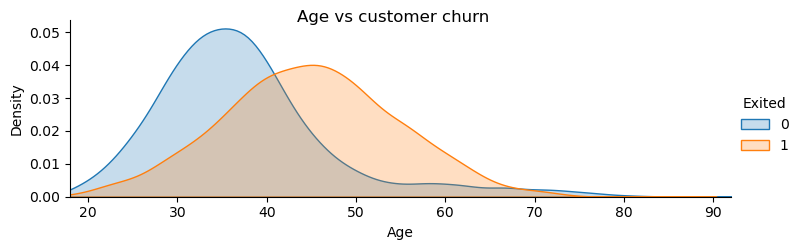

In [11]:
# Age vs customer churn
age_f = sns.FacetGrid(df, hue='Exited', aspect=3, height=2.5)
age_f.map(sns.kdeplot, 'Age', shade=True)
age_f.set(xlim=(df['Age'].min(), df['Age'].max()))
age_f.add_legend()
age_f.fig.suptitle('Age vs customer churn')
plt.show()          
          

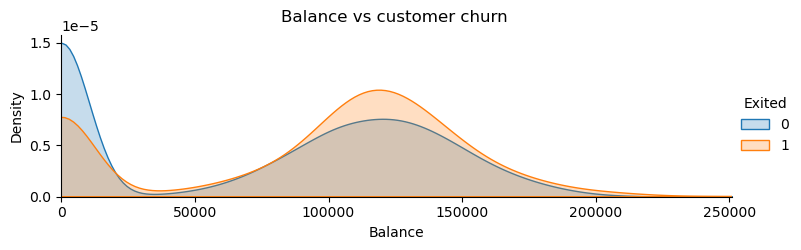

In [12]:
# Balance vs customer churn
balance_f = sns.FacetGrid(df, hue='Exited', aspect=3, height=2.5)
balance_f.map(sns.kdeplot, 'Balance', shade=True)
balance_f.set(xlim=(df['Balance'].min(), df['Balance'].max()))
balance_f.add_legend()
balance_f.fig.suptitle('Balance vs customer churn')
plt.show()    

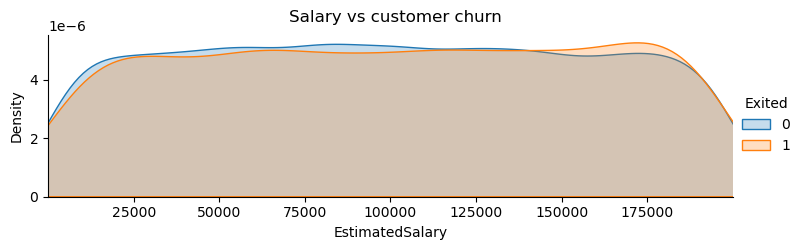

In [13]:
# EstimatedSalary vs customer churn
salary_f = sns.FacetGrid(df, hue='Exited', aspect=3, height=2.5)
salary_f.map(sns.kdeplot, 'EstimatedSalary', shade=True)
salary_f.set(xlim=(df['EstimatedSalary'].min(), df['EstimatedSalary'].max()))
salary_f.add_legend()
salary_f.fig.suptitle('Salary vs customer churn')
plt.show() 

_From above analysis:_
- Customers ageg around 34 has the highest rate of customer stay, while customers aged around 45 has highest customer churn rate. Generally, the older the customer when they are >40, more customers tend to leave.
- Customers with no balance has low churn rate and customers with balance around 120,000 has very high churn rate.
- Salary do not seem to have big impact on customer churn rate.

In [14]:
#'Geography' and 'Gender' are object, both also influence customer churn
# data encoding with get_dummies()
df_ec = pd.get_dummies(df, drop_first=True)
df_ec.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0


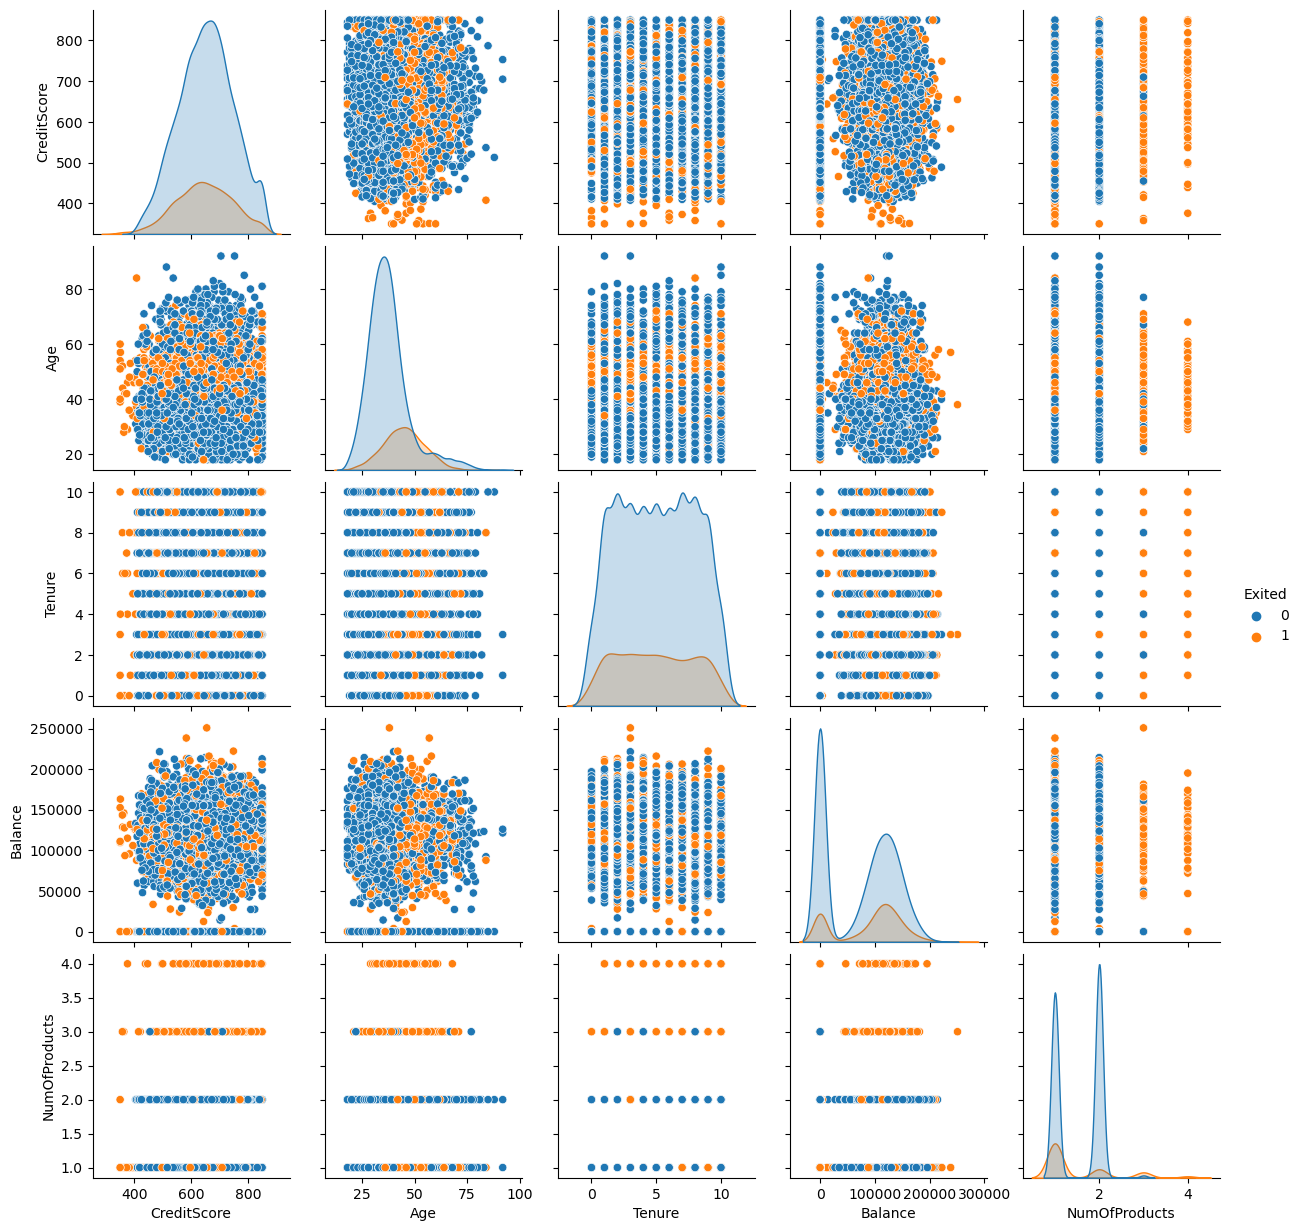

In [15]:
# Pair plot 1/2
sns.pairplot(df_ec, vars=['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts'], hue='Exited')

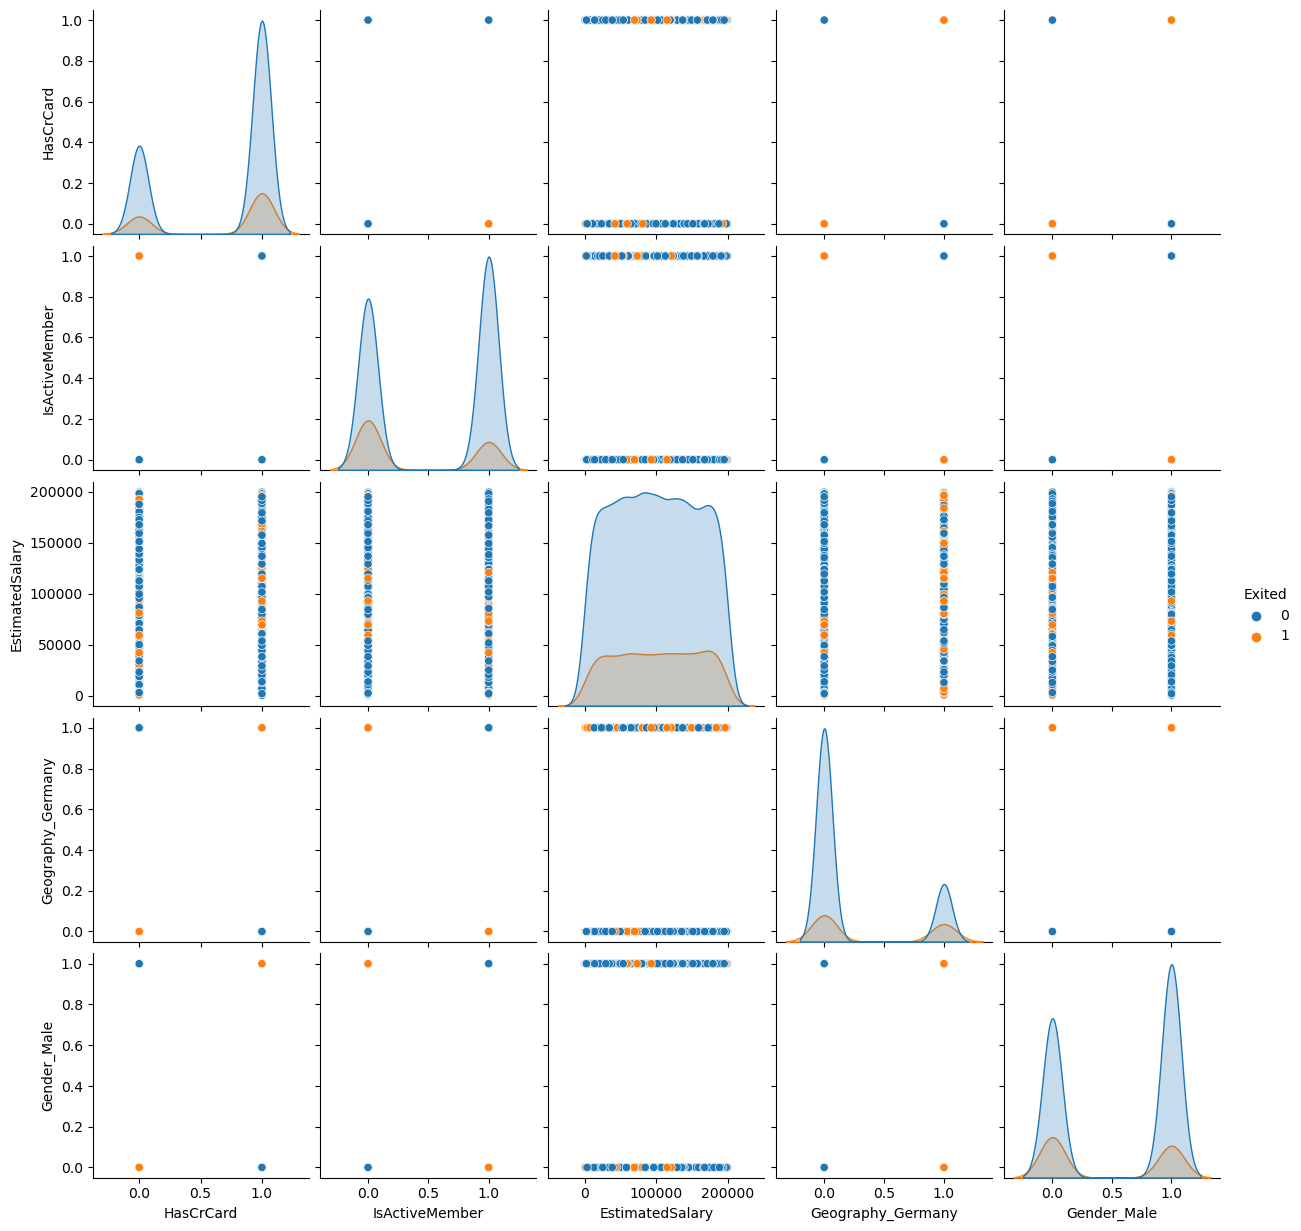

In [16]:
# Pair plot 2/2
sns.pairplot(df_ec, vars=['HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Gender_Male'], hue='Exited')

Text(0.5, 1.0, 'Correlation heatmap of customer churn dataset')

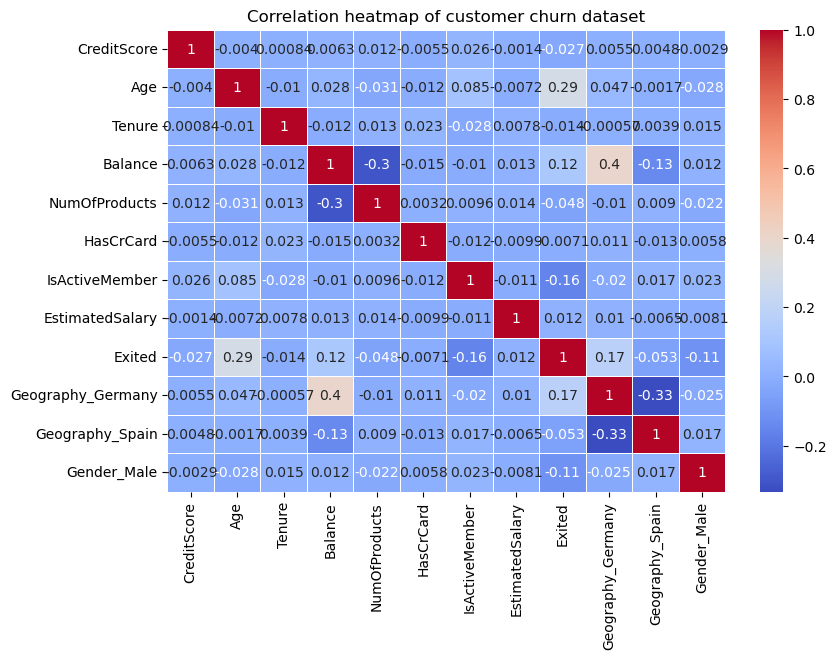

In [17]:
# Check feature colleration
plt.figure(figsize=(9,6))
corr = df_ec.corr()

sns.heatmap(corr, fmt='.2g', annot=True, linewidth=0.5, cmap='coolwarm')
plt.title('Correlation heatmap of customer churn dataset')

In [18]:
# list correlation scores
corr_results = df_ec.corrwith(df_ec['Exited']).abs().nlargest(12)
corr_results

Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
IsActiveMember       0.156128
Balance              0.118533
Gender_Male          0.106512
Geography_Spain      0.052667
NumOfProducts        0.047820
CreditScore          0.027094
Tenure               0.014001
EstimatedSalary      0.012097
HasCrCard            0.007138
dtype: float64

_From above analysis:_
- data pairplot with regarding to customer churn fits well with separated analysis
- _Age > Geography > IsActiveMember > Balance > Gender_
- _Rest features are less significant, but still have some influence for customer churn_
- _Balance is mostly dependent on Geography and has negative colleration with NumOfProducts_
- _Analysis further conforms that more customer would churn if they have more than 3 products_


## 4.3 Data handling for ML

In [19]:
# assign X and y values
X = df_ec.drop('Exited', axis=1)
y = df_ec['Exited']
print('X shape', X.shape)
print('y shape', y.shape)

X shape (10000, 11)
y shape (10000,)


In [20]:
# from above data analysis, 'Exited' is imbalanced.
# SMOTE is used to handle the imbalanced data with oversampling
X, y = SMOTE().fit_resample(X, y)
print('value counts for y:\n',y.value_counts())

value counts for y:
 1    7963
0    7963
Name: Exited, dtype: int64


In [21]:
# dataset split with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (12740, 11)
X_test shape (3186, 11)
y_train shape (12740,)
y_test shape (3186,)


In [22]:
# Feature standardization/scalling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.48685033,  0.30989563, -0.66124307, ..., -0.5786796 ,
        -0.4662524 , -0.84142959],
       [ 1.09985111,  0.10892488, -1.40134733, ..., -0.5786796 ,
        -0.4662524 ,  1.18845357],
       [-0.36697218, -0.39350199, -1.0312952 , ...,  1.72807199,
        -0.4662524 , -0.84142959],
       ...,
       [ 0.20224283,  0.20941026,  1.18901758, ..., -0.5786796 ,
        -0.4662524 ,  1.18845357],
       [ 0.6072612 ,  0.30989563, -0.29119094, ..., -0.5786796 ,
        -0.4662524 , -0.84142959],
       [ 0.5306361 ,  1.01329325, -1.40134733, ...,  1.72807199,
        -0.4662524 ,  1.18845357]])

### 4.4 Machine learning (ML) prediction

In [23]:
log_clf = LogisticRegression() # logistic regression
knn_clf = KNeighborsClassifier() # KNeighbors classifier
dt_clf = DecisionTreeClassifier() # Decision tree classifier
rnd_clf = RandomForestClassifier() # Random forest classifier
gb_clf = GradientBoostingClassifier() # Gradient boosting classifier
svm_clf = SVC() # Support vector classifier 

In [24]:
# performance measurement of each ML classifier
ML_list = [log_clf, knn_clf, dt_clf, rnd_clf, gb_clf, svm_clf]
for clf in ML_list:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
  
    print('\033[1m' + clf.__class__.__name__ + '\033[0m',
          '\n______________________________________________________',
          '\n', classification_report(y_test, y_pred, digits=4),
          '\n.......................................................',
          '\n Accuracy score', round(accuracy_score(y_test, y_pred), 4), 
          '\n Precision score', round(precision_score(y_test, y_pred), 4),
          '\n Recall score', round(recall_score(y_test, y_pred), 4), 
          '\n F1 score', round(f1_score(y_test, y_pred), 4), 
          '\n______________________________________________________\n')

LogisticRegression 
______________________________________________________ 
               precision    recall  f1-score   support

           0     0.7834    0.7753    0.7793      1633
           1     0.7662    0.7746    0.7704      1553

    accuracy                         0.7750      3186
   macro avg     0.7748    0.7749    0.7749      3186
weighted avg     0.7750    0.7750    0.7750      3186
 
....................................................... 
 Accuracy score 0.775 
 Precision score 0.7662 
 Recall score 0.7746 
 F1 score 0.7704 
______________________________________________________



C:\Users\feifei.zhang\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier 
______________________________________________________ 
               precision    recall  f1-score   support

           0     0.8288    0.8034    0.8159      1633
           1     0.7998    0.8255    0.8124      1553

    accuracy                         0.8142      3186
   macro avg     0.8143    0.8145    0.8142      3186
weighted avg     0.8146    0.8142    0.8142      3186
 
....................................................... 
 Accuracy score 0.8142 
 Precision score 0.7998 
 Recall score 0.8255 
 F1 score 0.8124 
______________________________________________________

DecisionTreeClassifier 
______________________________________________________ 
               precision    recall  f1-score   support

           0     0.7908    0.7685    0.7795      1633
           1     0.7636    0.7862    0.7747      1553

    accuracy                         0.7772      3186
   macro avg     0.7772    0.7774    0.7771      3186
weighted avg     0.7775    0.7772    0

_From above, Random Forest Classifier provides the highest accuracy and precision among all six classifier and is recommended to be used for production._

## 4.5 Save the model

In [25]:
# use joblib to save the model that performs the best
X = sc.fit_transform(X)
rnd_clf.fit(X, y)
joblib.dump(rnd_clf, "customer_churn_prediction") 


['customer_churn_prediction']

In [26]:
# test the saved model again
rf=joblib.load("customer_churn_prediction")
rf.predict(X_test)

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [27]:
df_ec.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

## Conclusions


- The following factors are likely to affect customer churn:
>- importance of each key factor: Age > Geography > IsActiveMember > Balance > Gender
>>- customers aged around 45 has highest customer churn rate. Generally, for customers aged over 40, a high customer churn rate is espected.
>>- Germany has the highest customer churn rate
>>- Not active member is more likely to stay
>>- Customers with balance around 120,000 has the highest churn rate.
>>- Female customers are more likely to churn

>- Other factors seem to have less impact on customer churn but is still influencing the outcome
>>- Morjority customers own 1-2 products, customers are more likely to churn when they own more then 3 products and no customer has stayed with the Bank for those who owns 4 products.
>>- Morjority clients owns a credit card and customers who have credit card have slighly higher customer churn rate in comparison to those without a card.

- Machine learning predictions carried out indicate that among all clasification modes random forest classifier provides the highest accuracy and precision score of 0.8818 and 0.8475, respectively. 
- The recommended production ML model for prediction customer churn is saved as 'customer_churn_prediction'.